In [39]:
import pandas as pd

data = pd.read_csv("sales_prediction.csv")
data.head(25)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [40]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

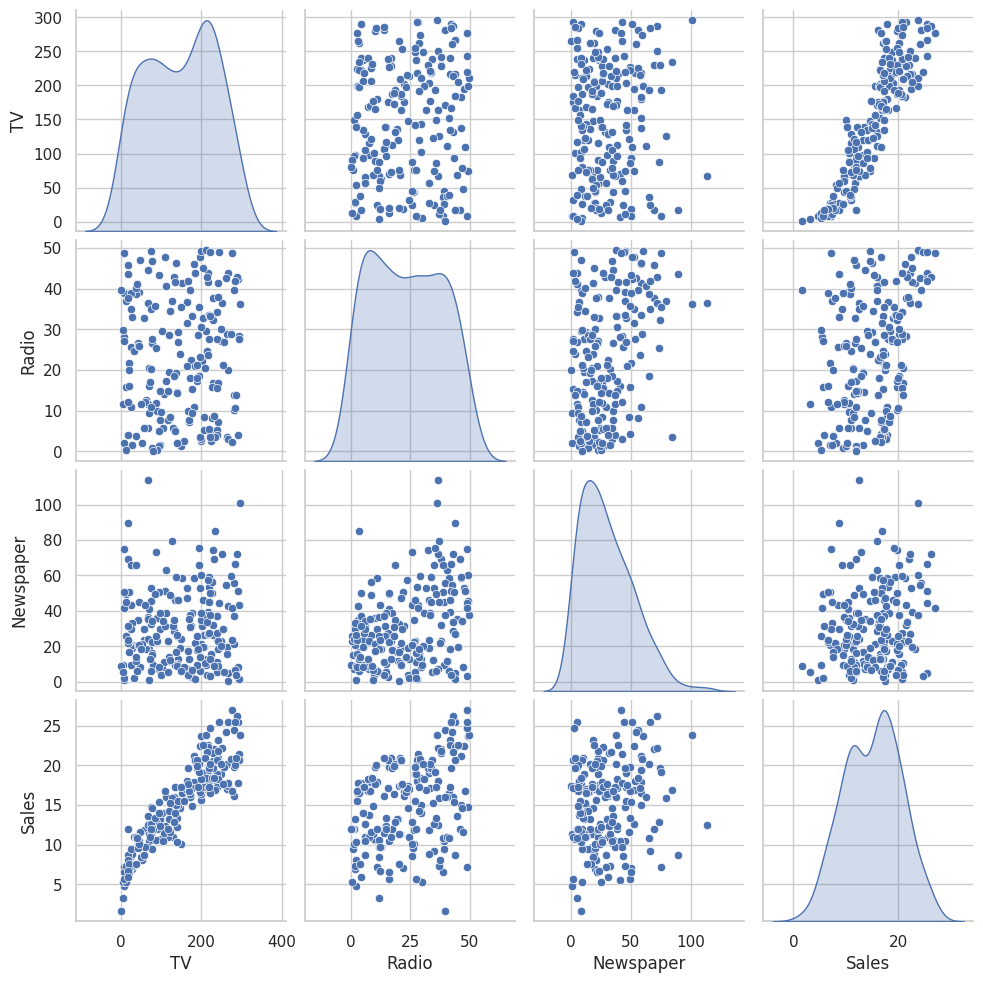

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

sns.pairplot(data, diag_kind='kde')

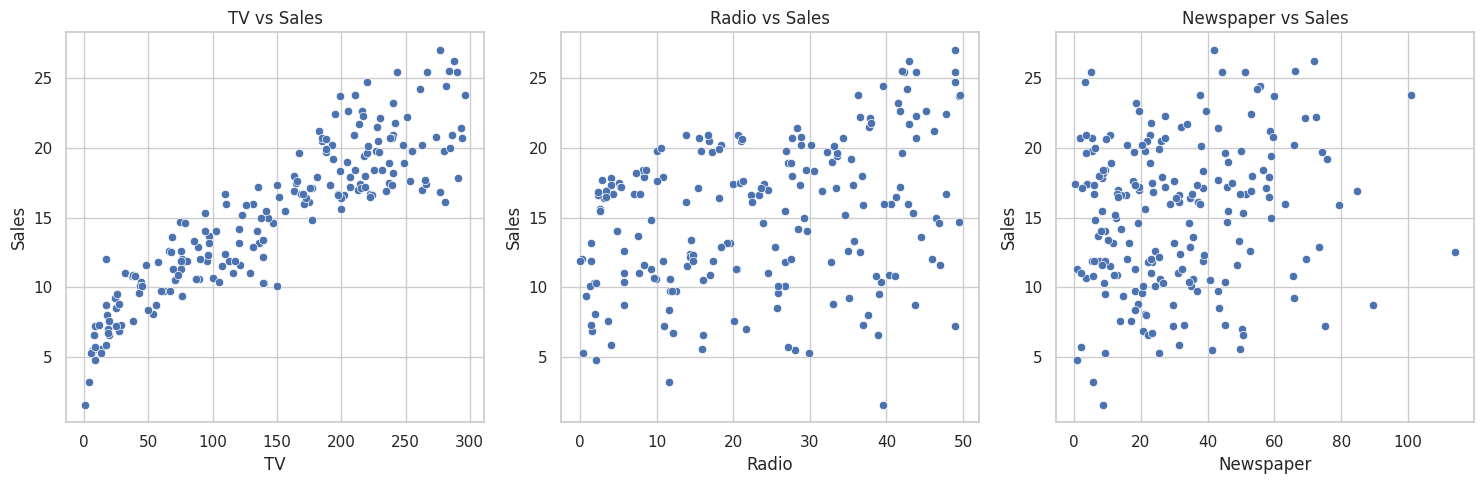

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

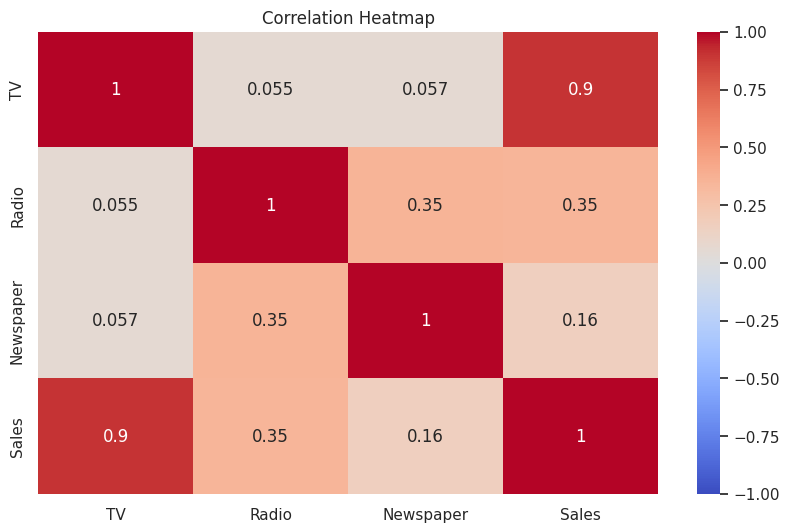

In [43]:
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

In [44]:
from sklearn.model_selection import train_test_split

x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.8685706338964962
R-squared: 0.8972649704616219


In [47]:
tolerance = 0.10

correct_predictions = ((abs(y_test - y_pred) / y_test) <= tolerance).sum()

accuracy = correct_predictions / len(y_test)

print(f"Accuracy within ±{tolerance*100}% tolerance: {accuracy*100:.2f}%")

Accuracy within ±10.0% tolerance: 60.00%
